# Lead Scoring Predictive Model

#Data Preparation

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load Dataset
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Assignment/Lead Scoring.csv")
data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [ ]:
# To check data shape (row, col)
data.shape

(9240, 37)

Check for duplicate

In [ ]:
data_dup = data.copy()

# Check for duplicate & dropping th entire duplicate row if any
data_dup.drop_duplicates(subset = None, inplace = True)

print("Raw data: ", data.shape)
print("Removed duplicated: ", data_dup.shape)

Raw data:  (9240, 37)
Removed duplicated:  (9240, 37)


In [ ]:
# Drop irrelevant variables
data = data.drop(["Prospect ID", "Lead Number"], axis = 1)
data.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


"Prospect ID" & "Lead Number" refers to the unique ID and number assigned to the customer / lead. Not relevant for model building. To drop.  

## Data Inspection, Exploratory Data Analysis, Preprocessing

In [ ]:
# To check data types
data.dtypes

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                                          object
Newspaper Article                                 object
X Education Forums             

In [ ]:
# Assign for categorical and numerical variables

cat_var = data.select_dtypes(include = ['object'])
num_var = data.select_dtypes(exclude = ['object'])

In [ ]:
cat_var.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,...,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,...,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,No,No,Modified
1,API,Organic Search,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,...,NaN,No,No,Select,Select,02.Medium,02.Medium,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,...,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,...,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified
4,Landing Page Submission,Google,No,No,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,...,Might be,No,No,Select,Mumbai,02.Medium,01.High,No,No,Modified


In [ ]:
# Drop target variable from num_var
num_var = num_var.drop('Converted', axis = 1)
num_var.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,0.0,0,0.0,15.0,15.0
1,5.0,674,2.5,15.0,15.0
2,2.0,1532,2.0,14.0,20.0
3,1.0,305,1.0,13.0,17.0
4,2.0,1428,1.0,15.0,18.0


In [ ]:
# Find the counts for each class in Target variable
data["Converted"].value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

###1.0 Exploring Categorical Variable

In [ ]:
cat_var.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [ ]:
cat_var.shape

(9240, 29)

####a.Multi-level variable:

1. To check if there is any duplicate values within the variable
2. Replacing redundant values.
3. Having too many classes in a variables may not be useful for model building. Hence, to group any class with <10 obs into "Others".
4. Some variables found to have "Select" as the class. This indicates that the lead does not provide any option for that particular feature.  Hence, to make these records as missing.

In [ ]:
# Statistical Summary of the categorical variables, one by one - Multilevel
print("Statistical Summary of the categorical variables: ")
print("\n1. Leads Origin: ", len(data['Lead Origin'].unique()),'\n', data['Lead Origin'].describe());
print("\n2. Leads Source: ", len(data['Lead Source'].unique()),'\n', data['Lead Source'].describe());
print("\n3. Last Activity: ", len(data['Last Activity'].unique()),'\n', data['Last Activity'].describe());
print("\n4. Country: ", len(data['Country'].unique()),'\n', data['Country'].describe());
print("\n5. Specialization: ", len(data['Specialization'].unique()),'\n', data['Specialization'].describe());
print("\n6. How did you hear about X Education: ", len(data['How did you hear about X Education'].unique()),'\n', data['How did you hear about X Education'].describe());
print("\n7. What is your current occupation: ", len(data['What is your current occupation'].unique()),'\n', data['What is your current occupation'].describe());
print("\n8. What matters most to you in choosing a course: ", len(data['What matters most to you in choosing a course'].unique()),'\n', data['What matters most to you in choosing a course'].describe());
print("\n9. Lead Profile: ", len(data['Lead Profile'].unique()),'\n', data['Lead Profile'].describe());
print("\n10. City: ", len(data['City'].unique()),'\n', data['City'].describe());
print("\n11. A free copy of Mastering The Interview: ", len(data['A free copy of Mastering The Interview'].unique()),'\n', data['A free copy of Mastering The Interview'].describe());
print("\n12. Last Notable Activity: ", len(data['Last Notable Activity'].unique()),'\n', data['Last Notable Activity'].describe());


Statistical Summary of the categorical variables: 

1. Leads Origin:  5 
 count                        9240
unique                          5
top       Landing Page Submission
freq                         4886
Name: Lead Origin, dtype: object

2. Leads Source:  22 
 count       9204
unique        21
top       Google
freq        2868
Name: Lead Source, dtype: object

3. Last Activity:  18 
 count             9137
unique              17
top       Email Opened
freq              3437
Name: Last Activity, dtype: object

4. Country:  39 
 count      6779
unique       38
top       India
freq       6492
Name: Country, dtype: object

5. Specialization:  20 
 count       7802
unique        19
top       Select
freq        1942
Name: Specialization, dtype: object

6. How did you hear about X Education:  11 
 count       7033
unique        10
top       Select
freq        5043
Name: How did you hear about X Education, dtype: object

7. What is your current occupation:  7 
 count           6550
uniqu

a. Lead Source

In [ ]:
# Find the counts for each class
data["Lead Source"].value_counts()

Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Facebook               55
bing                    6
google                  5
Click2call              4
Press_Release           2
Social Media            2
Live Chat               2
youtubechannel          1
testone                 1
Pay per Click Ads       1
welearnblog_Home        1
WeLearn                 1
blog                    1
NC_EDM                  1
Name: Lead Source, dtype: int64

Found duplicate values (i.e.,Google,google) and reduncant values which can be grouped together, eg:
(Social Media, Facebook , youtubechannel), (blog, welearnblog_Home)

In [ ]:
# Replacing redundant values
data['Lead Source'].replace('google','Google',inplace = True)
data['Lead Source'].replace('youtubechannel','Social Media',inplace = True)
data['Lead Source'].replace('Facebook','Social Media',inplace = True)
data['Lead Source'].replace('welearnblog_Home','blog',inplace = True)
data['Lead Source'].value_counts()

Google               2873
Direct Traffic       2543
Olark Chat           1755
Organic Search       1154
Reference             534
Welingak Website      142
Referral Sites        125
Social Media           58
bing                    6
Click2call              4
Press_Release           2
Live Chat               2
blog                    2
WeLearn                 1
testone                 1
Pay per Click Ads       1
NC_EDM                  1
Name: Lead Source, dtype: int64

In [ ]:
# Reduce number of classes that has obs < 10
data['Lead Source'].replace(['bing', 'Click2call','Press_Release','Live Chat', 'blog','WeLearn','testone', 'Pay per Click Ads','NC_EDM'],'Others', inplace = True)
data['Lead Source'].value_counts()

Google              2873
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Social Media          58
Others                20
Name: Lead Source, dtype: int64

b. Last Activity

In [ ]:
# Find the counts for each class
data['Last Activity'].value_counts()

Email Opened                    3437
SMS Sent                        2745
Olark Chat Conversation          973
Page Visited on Website          640
Converted to Lead                428
Email Bounced                    326
Email Link Clicked               267
Form Submitted on Website        116
Unreachable                       93
Unsubscribed                      61
Had a Phone Conversation          30
Approached upfront                 9
View in browser link Clicked       6
Email Received                     2
Email Marked Spam                  2
Visited Booth in Tradeshow         1
Resubscribed to emails             1
Name: Last Activity, dtype: int64

In [ ]:
# Reduce number of classes that has obs < 10
data['Last Activity'].replace(
    ['Approached upfront', 'View in browser link Clicked',
     'Email Received','Email Marked Spam', 'Visited Booth in Tradeshow','Resubscribed to emails'],
    'Others', inplace = True)
data['Last Activity'].value_counts()

Email Opened                 3437
SMS Sent                     2745
Olark Chat Conversation       973
Page Visited on Website       640
Converted to Lead             428
Email Bounced                 326
Email Link Clicked            267
Form Submitted on Website     116
Unreachable                    93
Unsubscribed                   61
Had a Phone Conversation       30
Others                         21
Name: Last Activity, dtype: int64

c. Country

In [ ]:
# Find the counts for each class
data['Country'].value_counts()

India                   6492
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Hong Kong                  7
Bahrain                    7
Oman                       6
France                     6
unknown                    5
South Africa               4
Nigeria                    4
Germany                    4
Kuwait                     4
Canada                     4
Sweden                     3
China                      2
Asia/Pacific Region        2
Uganda                     2
Bangladesh                 2
Italy                      2
Belgium                    2
Netherlands                2
Ghana                      2
Philippines                2
Russia                     1
Switzerland                1
Vietnam                    1
Denmark                    1
Tanzania                   1
Liberia                    1
Malaysia      

d. Specialization

In [ ]:
# Find the counts for each class
data['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [ ]:
# Make "Select" to missing
data['Specialization'].replace(['Select'], np.nan, inplace = True)
data['Specialization'].value_counts()

Finance Management                   976
Human Resource Management            848
Marketing Management                 838
Operations Management                503
Business Administration              403
IT Projects Management               366
Supply Chain Management              349
Banking, Investment And Insurance    338
Travel and Tourism                   203
Media and Advertising                203
International Business               178
Healthcare Management                159
Hospitality Management               114
E-COMMERCE                           112
Retail Management                    100
Rural and Agribusiness                73
E-Business                            57
Services Excellence                   40
Name: Specialization, dtype: int64

e. How did you hear about X Education

In [ ]:
# Find the counts for each class
data['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [ ]:
# Make "Select" to missing
data['How did you hear about X Education'].replace(['Select'], np.nan, inplace = True)
data['How did you hear about X Education'].value_counts()

Online Search            808
Word Of Mouth            348
Student of SomeSchool    310
Other                    186
Multiple Sources         152
Advertisements            70
Social Media              67
Email                     26
SMS                       23
Name: How did you hear about X Education, dtype: int64

f. What is your current occupation

In [ ]:
# Find the counts for each class
data['What is your current occupation'].value_counts()

Unemployed              5600
Working Professional     706
Student                  210
Other                     16
Housewife                 10
Businessman                8
Name: What is your current occupation, dtype: int64

g.What matters most to you in choosing a course

In [ ]:
# Find the counts for each class
data['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

h. Lead Profile

In [ ]:
# Find the counts for each class
data['Lead Profile'].value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [ ]:
# Make "Select" to missing
data['Lead Profile'].replace(['Select'], np.nan, inplace = True)
data['Lead Profile'].value_counts()

Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

i. City

In [ ]:
# Find the counts for each class
data['City'].value_counts()

Mumbai                         3222
Select                         2249
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [ ]:
# Make "Select" to missing
data['City'].replace(['Select'], np.nan, inplace = True)
data['City'].value_counts()

Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

Data Visualisation - Categorical Variables

Text(0, 0.5, 'Number of leads')

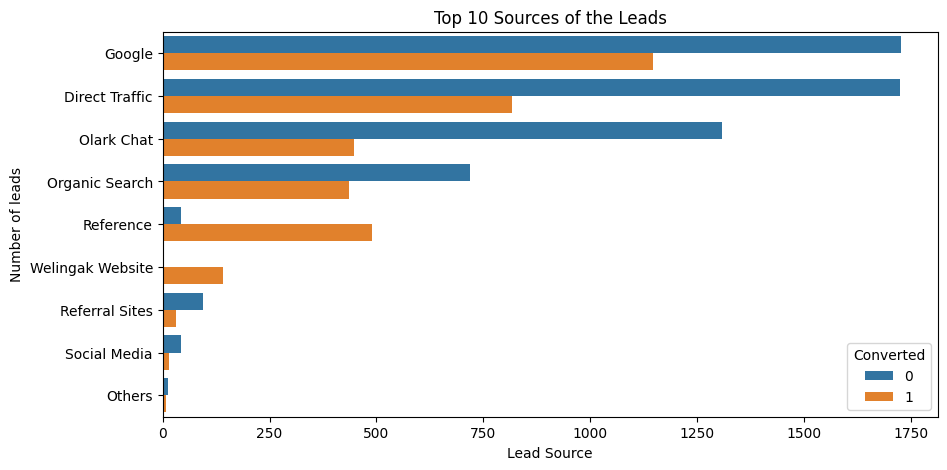

In [ ]:
# Plot bar chart - Lead Source
order = data['Lead Source'].value_counts().head(10).index

plt.figure(figsize = (10, 5))
sns.countplot(data = data, y = 'Lead Source', hue = 'Converted', order = order)
plt.title("Top 10 Sources of the Leads")
plt.xlabel("Lead Source")
plt.ylabel("Number of leads")

Text(0, 0.5, 'Number of leads')

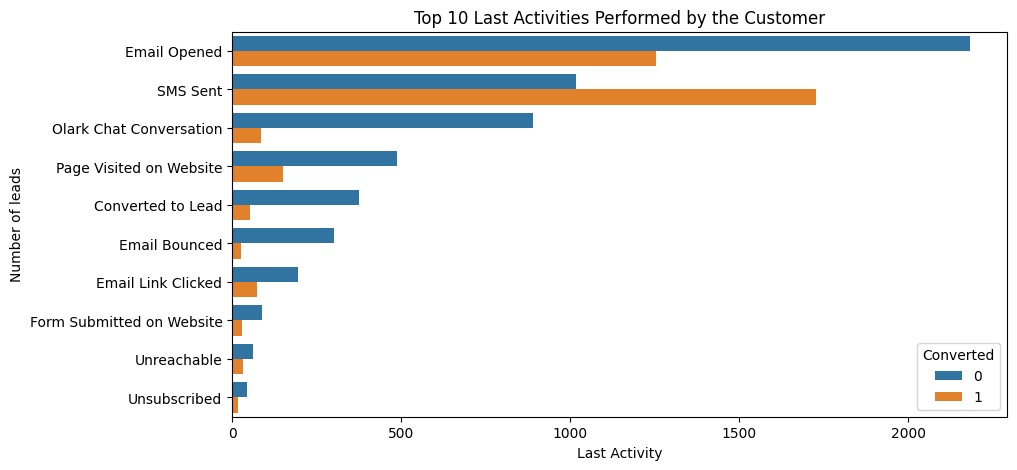

In [ ]:
# Plot bar chart - Last Activity
order = data['Last Activity'].value_counts().head(10).index

plt.figure(figsize = (10, 5))
sns.countplot(data = data, y = 'Last Activity', hue = 'Converted', order = order)
plt.title("Top 10 Last Activities Performed by the Customer")
plt.xlabel("Last Activity")
plt.ylabel("Number of leads")

Text(0, 0.5, 'Number of leads')

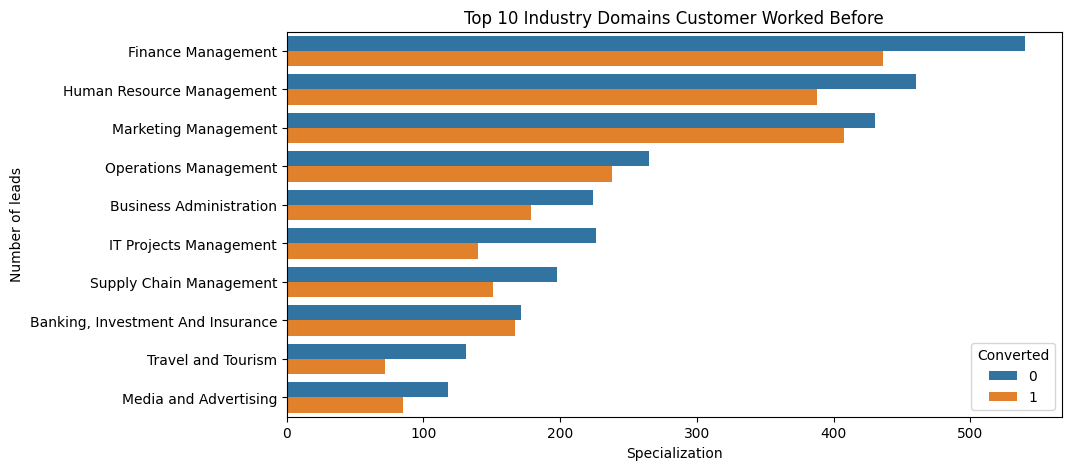

In [ ]:
# Plot bar chart - Specialization
order = data['Specialization'].value_counts().head(10).index

plt.figure(figsize = (10, 5))
sns.countplot(data = data, y = 'Specialization', hue = 'Converted', order = order)
plt.title("Top 10 Industry Domains Customer Worked Before")
plt.xlabel("Specialization")
plt.ylabel("Number of leads")


Text(0, 0.5, 'Number of leads')

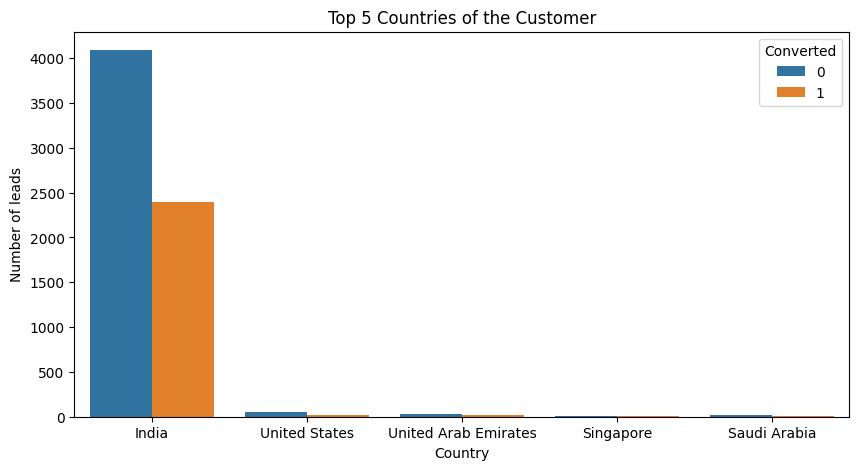

In [ ]:
# Plot bar chart - Country
order = data['Country'].value_counts().head(5).index

plt.figure(figsize = (10, 5))
sns.countplot(data = data, x = 'Country', hue = 'Converted', order = order)
plt.title("Top 5 Countries of the Customer")
plt.xlabel("Country")
plt.ylabel("Number of leads")


Text(0, 0.5, 'Number of leads')

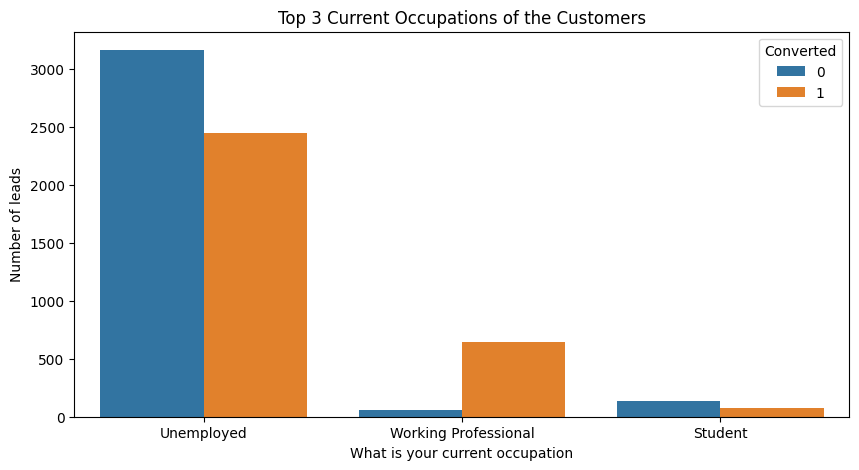

In [ ]:
# Plot bar chart - What is your current occupation
order = data['What is your current occupation'].value_counts().head(3).index

plt.figure(figsize = (10, 5))
sns.countplot(data = data, x = 'What is your current occupation', hue = 'Converted', order = order)
plt.title("Top 3 Current Occupations of the Customers")
plt.xlabel("What is your current occupation")
plt.ylabel("Number of leads")


Text(0, 0.5, 'Number of leads')

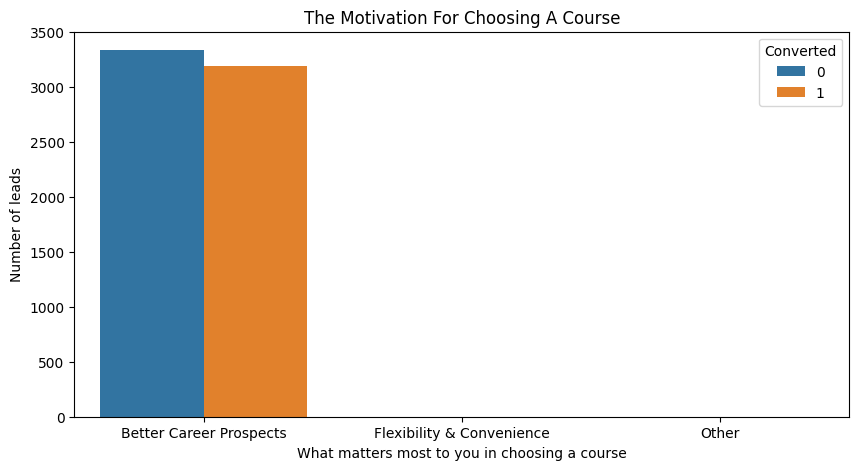

In [ ]:
# Plot bar chart - What matters most to you in choosing a course
order = data['What matters most to you in choosing a course'].value_counts().head(10).index

plt.figure(figsize = (10, 5))
sns.countplot(data = data, x = 'What matters most to you in choosing a course', hue = 'Converted', order = order)
plt.title("The Motivation For Choosing A Course")
plt.xlabel("What matters most to you in choosing a course")
plt.ylabel("Number of leads")


####b.Binary variable:

In [ ]:
# Find the counts for each class - Binary Variables
print("1. Do Not Email: \n", data["Do Not Email"].value_counts())
print("\n2. Do not Call: \n", data["Do Not Call"].value_counts())
print("\n3. Search: \n", data["Search"].value_counts())
print("\n4. Magazine: \n", data["Magazine"].value_counts())
print("\n5. Receive More Updates About Our Courses: \n", data["Receive More Updates About Our Courses"].value_counts())
print("\n6. Update me on Supply Chain Content: \n", data["Update me on Supply Chain Content"].value_counts())
print("\n7. Get updates on DM Content: \n", data["Get updates on DM Content"].value_counts())
print("\n8. I agree to pay the amount through cheque: \n", data["I agree to pay the amount through cheque"].value_counts())


1. Do Not Email: 
 No     8506
Yes     734
Name: Do Not Email, dtype: int64

2. Do not Call: 
 No     9238
Yes       2
Name: Do Not Call, dtype: int64

3. Search: 
 No     9226
Yes      14
Name: Search, dtype: int64

4. Magazine: 
 No    9240
Name: Magazine, dtype: int64

5. Receive More Updates About Our Courses: 
 No    9240
Name: Receive More Updates About Our Courses, dtype: int64

6. Update me on Supply Chain Content: 
 No    9240
Name: Update me on Supply Chain Content, dtype: int64

7. Get updates on DM Content: 
 No    9240
Name: Get updates on DM Content, dtype: int64

8. I agree to pay the amount through cheque: 
 No    9240
Name: I agree to pay the amount through cheque, dtype: int64


5 variables found to have only 1 level of class (i.e., No) for all observations:
1. Magazine
2. Receive More Updates About Our Courses
3. Update me on Supply Chain Content
4. Get updates on DM Content
5. I agree to pay the amount through cheque

###Check for Missing value

In [ ]:
# Create a function to detect and calculate missing values

def missing_values_table(df):

  # Check for missing value
  mis_val = df.isnull().sum()

  # % of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)

  # Filter variable with missing value > 30%
  mis_val_todrop = ((data.isnull().sum() / len(data)) * 100) > 30

  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_todrop], axis = 1)

  # Rename the columns
  mis_val_table_rename_columns = mis_val_table.rename(columns =
                                {0 : "Missing Counts", 1 : "Percentage", 2 : "Missing Value Percentage > 30%"})

  # Sort the table by percentage of missing descending
  mis_val_table_rename_columns = mis_val_table_rename_columns[mis_val_table_rename_columns.iloc[:,1] !=0].sort_values(
                                  "Percentage", ascending = False).round(1)

  # Return the dataframe with mising information
  return mis_val_table_rename_columns


 # Call out the function
missing_values_table(data)


,Missing Counts,Percentage,Missing Value Percentage > 30%
How did you hear about X Education,7250,78.5,True
Lead Profile,6855,74.2,True
Lead Quality,4767,51.6,True
Asymmetrique Profile Score,4218,45.6,True
Asymmetrique Activity Score,4218,45.6,True
Asymmetrique Profile Index,4218,45.6,True
Asymmetrique Activity Index,4218,45.6,True
City,3669,39.7,True
Specialization,3380,36.6,True
Tags,3353,36.3,True


10 variables found having missing values more than 30% (i.e., "How did you hear about X Education", "Lead Profile", "Lead Quality", "Asymmetrique Profile Score", "Asymmetrique Activity Score", "Asymmetrique Profile Index", "Asymmetrique Activity Index", "City", "Specialization", "Tags")
having missing value more than 30%.

In [ ]:
# Drop variables with missing values more than 30%
print("Columns (Before dropping): ", data.columns)
print("\nData shape (Before dropping): ", data.shape)

df1 = data.drop(["How did you hear about X Education", "Lead Profile", "Lead Quality", "Asymmetrique Profile Score",
                 "Asymmetrique Activity Score", "Asymmetrique Profile Index", "Asymmetrique Activity Index", "City", "Specialization", "Tags"],
                axis = 1)

print("\nColumns (After dropping): ", df1.columns)
print("\nData shape (After dropping): ", df1.shape)


Columns (Before dropping):  Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

Data shape (Before 

Imputation for missing values

In [ ]:
df1.isnull().sum()

Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums                                  0
Newspaper                                           0
Digital Advertisement                               0
Through Recommendations     

In [ ]:
# Impute missing value using Imputer from Sklearn
from sklearn.impute import SimpleImputer

# Define the 1st imputer for numeric variable
imputer_num = SimpleImputer(missing_values = np.nan, strategy = "mean")

# Imputing missing numeric values
df1[['TotalVisits', 'Page Views Per Visit']] = imputer_num.fit_transform(df1[['TotalVisits', 'Page Views Per Visit']])


# Define the 2nd imputer for categorical variable
imputer_cat = SimpleImputer(missing_values = np.nan, strategy = "most_frequent")

# Imputing missing categorical values
df1[['Lead Source', 'Last Activity', 'Country', 'What is your current occupation','What matters most to you in choosing a course']] = imputer_cat.fit_transform(
    df1[['Lead Source', 'Last Activity', 'Country', 'What is your current occupation','What matters most to you in choosing a course']])

df1 = df1.round()


In [ ]:
# Check if there is still missing values
df1.isnull().sum()

Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums                               0
Newspaper                                        0
Digital Advertisement                            0
Through Recommendations                          0
Receive More Updates About Our 

### 2.0 Exploring Numeric Variables

In [ ]:
# Basic descriptive statistical details of the numeric variables
df1.describe()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9240.000000,9240.000000,9240.000000,9240.000000
mean,0.385390,3.438636,487.698268,2.362338
std,0.486714,4.819024,548.021466,2.145253
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,12.000000,1.000000
50%,0.000000,3.000000,248.000000,2.000000
75%,1.000000,5.000000,936.000000,3.000000
max,1.000000,251.000000,2272.000000,55.000000


In [ ]:
# Assigning numerical variables after imputation of missing values
df1_num_var = df1.select_dtypes(exclude = ['object'])
df1_num_var = df1_num_var.drop('Converted', axis = 1)
df1_num_var_col = df1_num_var.columns
df1_num_var_col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'], dtype='object')

####a) Is the min & max value acceptable?

Two variables seems to have abnormal minimum zero values:

1. Total Time Spent on Website
2. Page Views Per Visit


In [ ]:
# Check the number of observation that has 0 Total Time Spent on Website
df1_num_var['Total Time Spent on Website'].value_counts()

0       2193
60        19
74        18
75        18
127       18
        ... 
1701       1
1952       1
1229       1
1743       1
927        1
Name: Total Time Spent on Website, Length: 1731, dtype: int64

In [ ]:
# Check the number of observation that has 0 Page Views Per Visit
df1_num_var['Page Views Per Visit'].value_counts()

2.0     2720
0.0     2189
3.0     1329
4.0     1072
1.0      776
5.0      526
6.0      282
7.0      135
8.0       91
9.0       45
10.0      25
11.0      18
14.0      10
12.0       7
13.0       6
15.0       4
16.0       3
55.0       1
24.0       1
Name: Page Views Per Visit, dtype: int64

Findings: There are high number of observations having zero values for these 2 variables. The zero values are accepable due to these leads were identified via other lead sources where data such as time spend and number of page views are not available for collection by the company.

####b) Any outliers or extreme values?
Detect and find the outlier value using IQR & boxplot method.  Anything above upper bound and below lower bound is deemed as outliers.

Two variables found to have outliers values:
1. TotalVisits
2. Page Views Per Visit


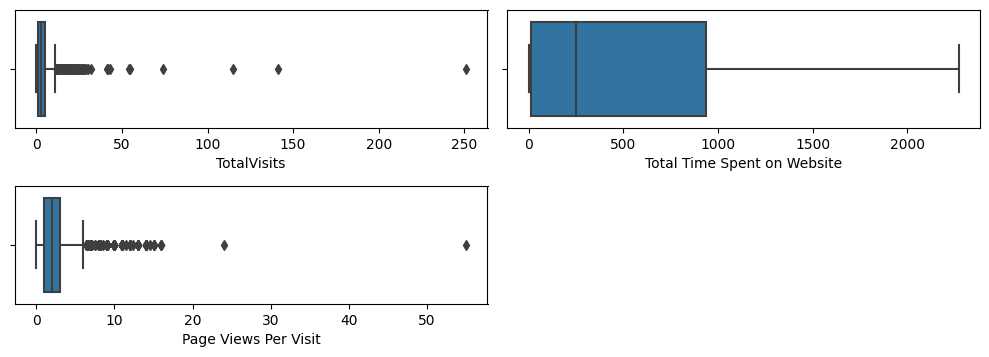

In [ ]:
# Create a function to plot boxplot for all numberic variables to check outliers

fig = plt.figure(figsize=(10,5))

for i in range(3):
  fig.tight_layout()

  grid_col ="32{}".format(i+1)

  ax = fig.add_subplot(int(grid_col))

  sns.boxplot(data = data, x = df1_num_var_col[i], ax=ax)

plt.show()

2 variables consists of outliers (i.e., TotalVisits, Page Views Per Visit)

In [ ]:
# TotalVisits - Outliers Treatment

Q1 = df1['TotalVisits'].quantile(0.25)
Q3 = df1['TotalVisits'].quantile(0.75)

IQR = Q3-Q1

lower_bound = (Q1-1.5*IQR)
upper_bound = (Q3+1.5*IQR)

df1.loc[(df1['TotalVisits'] <= lower_bound), 'TotalVisits'] = lower_bound
df1.loc[(df1['TotalVisits'] >= upper_bound), 'TotalVisits'] = upper_bound


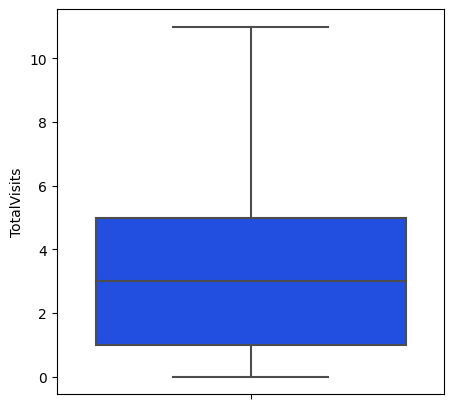

In [ ]:
# Check for outliers again after outlier treatment
fig = plt.figure(figsize=(5,5))

sns.boxplot(data = df1, y ='TotalVisits', palette='bright')

plt.show()

In [ ]:
# Page Views Per Visit - Outliers Treatment

Q1 = df1['Page Views Per Visit'].quantile(0.25)
Q3 = df1['Page Views Per Visit'].quantile(0.75)

IQR = Q3-Q1

lower_bound = (Q1-1.5*IQR)
upper_bound = (Q3+1.5*IQR)

df1.loc[(df1['Page Views Per Visit'] <= lower_bound), 'Page Views Per Visit'] = lower_bound
df1.loc[(df1['Page Views Per Visit'] >= upper_bound), 'Page Views Per Visit'] = upper_bound


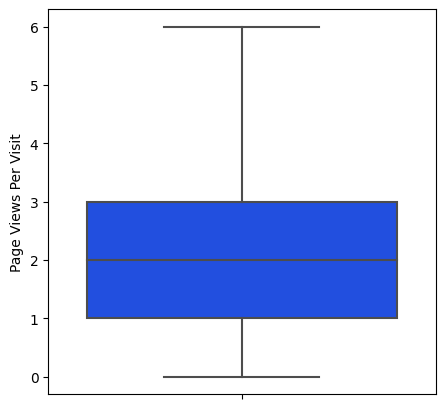

In [ ]:
# Check for outliers again after outlier treatment
fig = plt.figure(figsize=(5,5))

sns.boxplot(data = df1, y ='Page Views Per Visit', palette='bright')

plt.show()

Data Visualisation - Binary

Text(0, 0.5, 'TotalVisits')

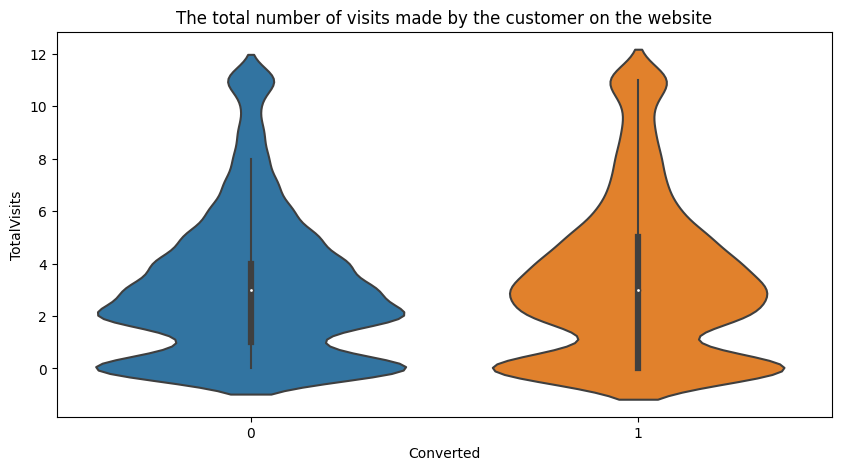

In [ ]:
# Plot bar chart - TotalVisits

plt.figure(figsize = (10, 5))
sns.violinplot(y = 'TotalVisits', x = 'Converted', data = df1)
plt.title("The total number of visits made by the customer on the website")
plt.xlabel("Converted")
plt.ylabel("TotalVisits")


Median for converted and not converted leads are the same.

Text(0, 0.5, 'Total Time Spent on Website')

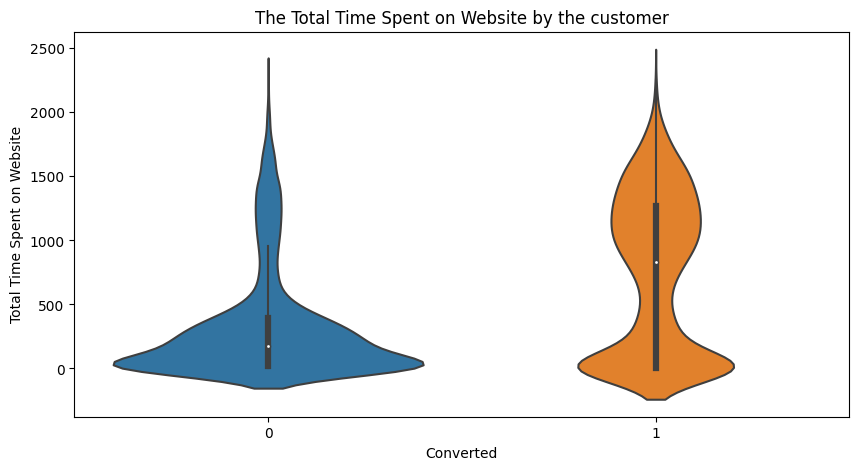

In [ ]:
# Plot bar chart - Total Time Spent on Website

plt.figure(figsize = (10, 5))
sns.violinplot(y = 'Total Time Spent on Website', x = 'Converted', data = df1)
plt.title("The Total Time Spent on Website by the customer")
plt.xlabel("Converted")
plt.ylabel("Total Time Spent on Website")


Leads spending more time on the website are more likely to be converted.

Text(0, 0.5, 'Page Views Per Visit')

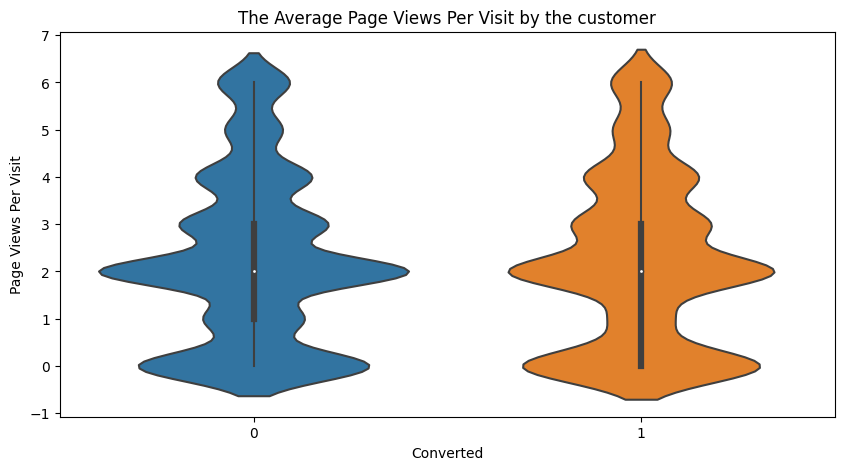

In [ ]:
# Plot bar chart - Total Time Spent on Website

plt.figure(figsize = (10, 5))
sns.violinplot(y = 'Page Views Per Visit', x = 'Converted', data = df1)
plt.title("The Average Page Views Per Visit by the customer")
plt.xlabel("Converted")
plt.ylabel("Page Views Per Visit")


Median for converted and unconverted leads is the same.

#Correlation Coefficients
To see which variables are highly correlated



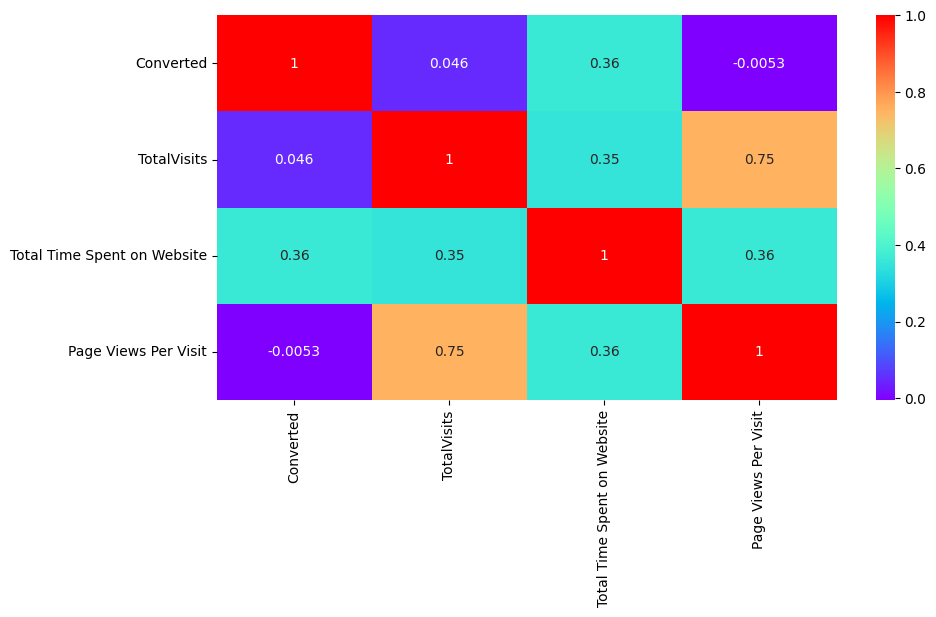

In [ ]:
# Check for correlation

plt.figure(figsize = (10, 5))
sns.heatmap(df1.corr(), annot = True, cmap = "rainbow")
plt.show()

Total Visits & Page Views per Vist are slighlty
correlated with correlation of 0.75. But still acceptable.

# Label encoding


Perform label encoding on input variables only since target variable is already a non string value.

In [ ]:
# Check the data info
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   object 
 9   Country                                        9240 

In [ ]:
df1.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,India,...,No,No,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.0,Email Opened,India,...,No,No,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,No,No,No,No,No,No,No,Modified


In [ ]:
# Make a copy
df2 = df1.copy()

In [ ]:
# Label encoding using sklearn
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# To assign numeric value to string value for all categorical variables
df2[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'What is your current occupation',
     'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
     'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
     'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
     'A free copy of Mastering The Interview', 'Last Notable Activity']] = df2[
          ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'Last Activity', 'Country', 'What is your current occupation',
           'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper',
           'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses',
           'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',
           'A free copy of Mastering The Interview', 'Last Notable Activity']
          ].apply(labelencoder.fit_transform)

df2.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,2,0,0,0,0.0,0,0.0,8,12,...,0,0,0,0,0,0,0,0,0,8
1,0,3,0,0,0,5.0,674,2.0,3,12,...,0,0,0,0,0,0,0,0,0,4
2,1,0,0,0,1,2.0,1532,2.0,3,12,...,0,0,0,0,0,0,0,0,1,4
3,1,0,0,0,0,1.0,305,1.0,10,12,...,0,0,0,0,0,0,0,0,0,8
4,1,1,0,0,1,2.0,1428,1.0,0,12,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
# Check the data info
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 25 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   int64  
 1   Lead Source                                    9240 non-null   int64  
 2   Do Not Email                                   9240 non-null   int64  
 3   Do Not Call                                    9240 non-null   int64  
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9240 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9240 non-null   float64
 8   Last Activity                                  9240 non-null   int64  
 9   Country                                        9240 

#Feature Scaling

In [ ]:
# Make a copy
df3 = df2.copy()

In [ ]:
df3.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,2,0,0,0,0.0,0,0.0,8,12,...,0,0,0,0,0,0,0,0,0,8
1,0,3,0,0,0,5.0,674,2.0,3,12,...,0,0,0,0,0,0,0,0,0,4
2,1,0,0,0,1,2.0,1532,2.0,3,12,...,0,0,0,0,0,0,0,0,1,4
3,1,0,0,0,0,1.0,305,1.0,10,12,...,0,0,0,0,0,0,0,0,0,8
4,1,1,0,0,1,2.0,1428,1.0,0,12,...,0,0,0,0,0,0,0,0,0,8


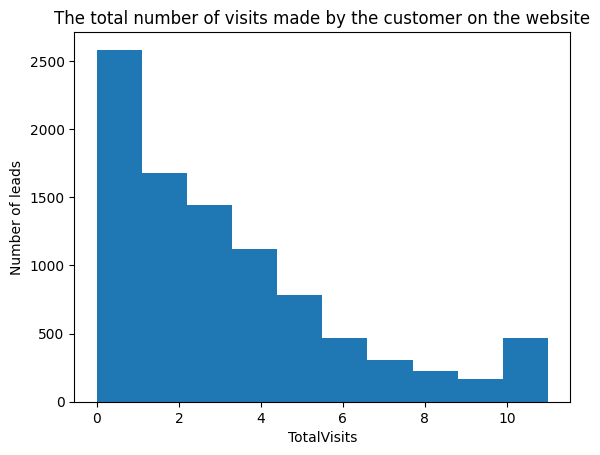

In [ ]:
# Check if data is normally distributed
import matplotlib.pyplot as plt

plt.hist(df3["TotalVisits"], bins = 10)
plt.xlabel("TotalVisits")
plt.ylabel("Number of leads")
plt.title("The total number of visits made by the customer on the website")
plt.show()

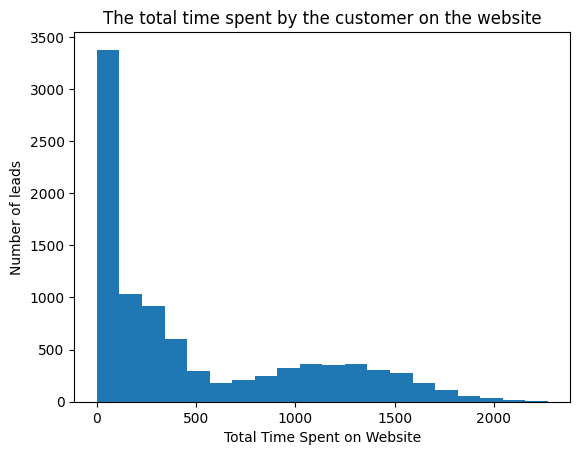

In [ ]:
# Check if data is normally distributed
import matplotlib.pyplot as plt

plt.hist(df3["Total Time Spent on Website"], bins = 20)
plt.xlabel("Total Time Spent on Website")
plt.ylabel("Number of leads")
plt.title("The total time spent by the customer on the website")
plt.show()

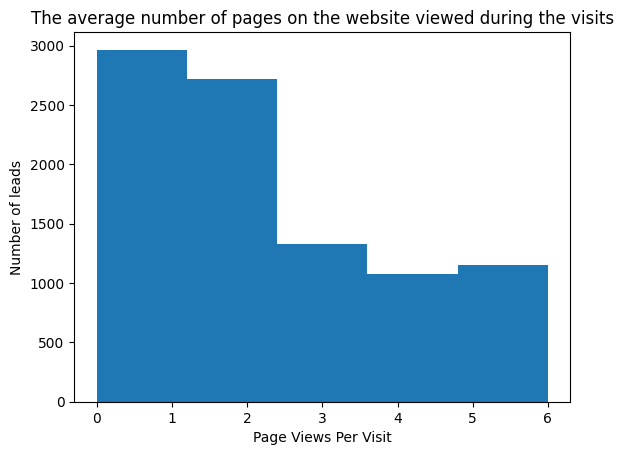

In [ ]:
# Check if data is normally distributed
import matplotlib.pyplot as plt

plt.hist(df3["Page Views Per Visit"], bins = 5)
plt.xlabel("Page Views Per Visit")
plt.ylabel("Number of leads")
plt.title("The average number of pages on the website viewed during the visits")
plt.show()

In [ ]:
# Normalisation using sklearn
from sklearn.preprocessing import MinMaxScaler

normal = MinMaxScaler()

df3[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = normal.fit_transform(df3[['TotalVisits', 'Total Time Spent on Website','Page Views Per Visit']])

df3.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,2,0,0,0,0.000000,0.000000,0.000000,8,12,...,0,0,0,0,0,0,0,0,0,8
1,0,3,0,0,0,0.454545,0.296655,0.333333,3,12,...,0,0,0,0,0,0,0,0,0,4
2,1,0,0,0,1,0.181818,0.674296,0.333333,3,12,...,0,0,0,0,0,0,0,0,1,4
3,1,0,0,0,0,0.090909,0.134243,0.166667,10,12,...,0,0,0,0,0,0,0,0,0,8
4,1,1,0,0,1,0.181818,0.628521,0.166667,0,12,...,0,0,0,0,0,0,0,0,0,8


# Assign Input & Target Variable

In [ ]:
# Assign IV & TV
X = df3.drop('Converted', axis = 1)
y = df3['Converted']

In [ ]:
X.shape

(9240, 24)

In [ ]:
X.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,What is your current occupation,...,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Update me on Supply Chain Content,Get updates on DM Content,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,0,2,0,0,0.000000,0.000000,0.000000,8,12,4,...,0,0,0,0,0,0,0,0,0,8
1,0,3,0,0,0.454545,0.296655,0.333333,3,12,4,...,0,0,0,0,0,0,0,0,0,4
2,1,0,0,0,0.181818,0.674296,0.333333,3,12,3,...,0,0,0,0,0,0,0,0,1,4
3,1,0,0,0,0.090909,0.134243,0.166667,10,12,4,...,0,0,0,0,0,0,0,0,0,8
4,1,1,0,0,0.181818,0.628521,0.166667,0,12,4,...,0,0,0,0,0,0,0,0,0,8


In [ ]:
y.shape

(9240,)

In [ ]:
y

0       0
1       0
2       1
3       0
4       1
       ..
9235    1
9236    0
9237    0
9238    1
9239    1
Name: Converted, Length: 9240, dtype: int64

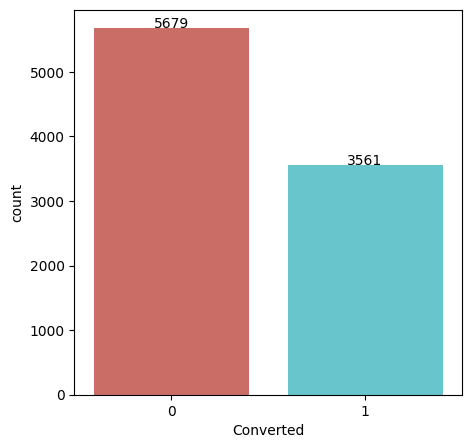

In [ ]:
# Target Variable = 'Converted'
plt.subplots(figsize=(5,5))
graph = sns.countplot(x = df3["Converted"], palette = 'hls')

i = 0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x() + p.get_width()/2., height + 2, df3['Converted'].value_counts()[i], ha = "center")
    i += 1

##OLS Regression Results

In [ ]:
# OLS Regression Results
import statsmodels.api as sm
X2 = sm.add_constant(X)
est = sm.OLS(y, X2).fit()
print(est.summary())

                            OLS Regression Results                            
Dep. Variable:              Converted   R-squared:                       0.311
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     218.8
Date:                Mon, 24 Jul 2023   Prob (F-statistic):               0.00
Time:                        02:19:49   Log-Likelihood:                -4737.7
No. Observations:                9240   AIC:                             9515.
Df Residuals:                    9220   BIC:                             9658.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------

Interpret the results:
1. "Adj R2" =  0.309, not as significant. TV cant be explained by IV.
2. "Prob (F-statistic)" = Since p-value < 0.05, the model is significant.
3. Variables such as 'Do Not Call', 'Country', 'What matters most to you in choosing a course', 'Search', 'Magazine', 'Newspaper Article','Digital Advertisement', 'Through Recommendations', p > 0.05, indicates not significant variables.

5. "Durbin-Watson" = 1.943.  Indicates "free from error", if the values falls between the range of 1.5 to 2.5, model is acceptable.


#Class Balancing

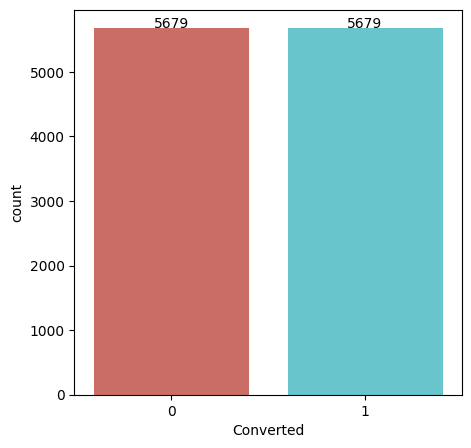

In [ ]:
# Perform class balancing on the target variable
from imblearn.over_sampling import SMOTE
X_b, y_b = SMOTE().fit_resample(X, y)

plt.subplots(figsize=(5,5))
graph = sns.countplot(x = y_b, palette ='hls')

i=0
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 2, y_b.value_counts()[i], ha="center")
    i += 1

# Data Split

In [ ]:
# Splitting the data into train and test - balanced class
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_b, y_b, train_size = 0.7, random_state = 42)

In [ ]:
X_train.shape

(7950, 24)

In [ ]:
X_test.shape

(3408, 24)

###Data Split (for sk tuner)

In [ ]:
# Assign IV & TV
X_b_array = X_b.values
y_b_array = y_b.values

X_b_array

array([[0., 2., 0., ..., 0., 0., 8.],
       [0., 3., 0., ..., 0., 0., 4.],
       [1., 0., 0., ..., 0., 1., 4.],
       ...,
       [0., 1., 0., ..., 0., 0., 4.],
       [1., 1., 0., ..., 0., 0., 2.],
       [1., 0., 0., ..., 0., 0., 8.]])

In [ ]:
y_b_array

array([0, 0, 1, ..., 1, 1, 1])

In [ ]:
# Splitting the data into train and test - balanced class
from sklearn.model_selection import train_test_split

X_tr, X_te, y_tr, y_te = train_test_split(X_b_array, y_b_array, train_size = 0.7, random_state = 42)

#Timer function

In [ ]:
# Create a timer function to calculate the running time each model
from datetime import datetime

def timer(start_time = None):
  if not start_time:
    start_time = datetime.now()
    return start_time
  elif start_time:
    thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
    tmin, tsec = divmod(temp_sec, 60)
    print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


# Model Building - Logistic Regression (LR)

##a.Base Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_auc_score

# Define Classifier
LR = LogisticRegression()
print(LR.get_params())

start_time = timer(None)

# Model fitting
LR.fit(X_train, y_train)

timer(start_time)

# Get the Train accuracy score
LR_train_acc = LR.score(X_train, y_train)*100

# Prediction on Test data
y_pred = LR.predict(X_test)

# Get the Test accuracy score
LR_acc     = accuracy_score(y_test, y_pred)*100
LR_pre     = precision_score(y_test, y_pred, average ='micro')
LR_recall  = recall_score(y_test, y_pred, average ='micro')
LR_f1      = f1_score(y_test, y_pred, average ='micro')
LR_auc     = roc_auc_score(y_test, y_pred)
LR_cls_rpt = classification_report(y_test, y_pred)

# Model Evaluation Measures
print('\n')
print('LR - Train Accuracy : {:.3f}'.format(LR_train_acc))
print('LR - Test Accuracy  : {:.3f}'.format(LR_acc))
print('LR - Precision      : {:.3f}'.format(LR_pre))
print('LR - Recall         : {:.3f}'.format(LR_recall))
print('LR - F1 Score       : {:.3f}'.format(LR_f1))
print('LR - AUC            : {:.3f}'.format(LR_auc))
print('\n Clasification Report:\n',(LR_cls_rpt))


{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}

 Time taken: 0 hours 0 minutes and 0.11 seconds.


LR - Train Accuracy : 76.126
LR - Test Accuracy  : 77.876
LR - Precision      : 0.779
LR - Recall         : 0.779
LR - F1 Score       : 0.779
LR - AUC            : 0.779

 Clasification Report:
               precision    recall  f1-score   support

           0       0.77      0.81      0.79      1719
           1       0.79      0.75      0.77      1689

    accuracy                           0.78      3408
   macro avg       0.78      0.78      0.78      3408
weighted avg       0.78      0.78      0.78      3408



##b.HP Tuning Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# Define Classifier
LR_1 = LogisticRegression()

# Define Hyper Parameters for tuning
parameters = {
    'random_state': [0, 100, 1], # The seed of the pseudo random number generated which is used while shuffling the data
    'C': [0.0001, 10, 10], # Inverse regularization parameter - A control variable that retains strength modification of Regularization by being inversely positioned to the Lambda regulator. C = 1/λ
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], # Optimization
    'penalty': ['l1', 'l2', 'elasticnet'], # Penalization (Regularization)
    'multi_class': ['auto', 'ovr']
}

# Define Hyper Parameters for tuning
parameters = {
    'random_state': [0, 100, 1],
    'C': [0.0001, 10, 10], # Inverse regularization parameter
    'solver': ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'], # Optimization
    'penalty': ['l1', 'l2', 'elasticnet'], # Penalization (Regularization)
    'multi_class': ['auto', 'ovr']
}


# Using RandomizedSearchCV for HP Tuning
LR_rand = RandomizedSearchCV(
    estimator = LR_1,
    param_distributions = parameters,
    scoring = 'accuracy',
    n_iter = 100,
    cv = 5,
    n_jobs = -1,
    verbose = 1,
    random_state = 42
)

start_time = timer(None)

# Model fitting
LR_rand.fit(X_train, y_train)

timer(start_time)

# To get the best parameters & score of the best model
print("\nBest Parameters:", LR_rand.best_params_)
print("\nBest Score:", LR_rand.best_score_)

# Get the Train accuracy score
LR_1_train_acc = LR_rand.score(X_train, y_train)*100


# Prediction on Test data
y_pred_1 = LR_rand.predict(X_test)

# Get the Test accuracy score
LR_1_acc     = accuracy_score(y_test, y_pred_1)*100
LR_1_pre     = precision_score(y_test, y_pred_1, average ='micro')
LR_1_recall  = recall_score(y_test, y_pred_1, average ='micro')
LR_1_f1      = f1_score(y_test, y_pred_1, average ='micro')
LR_1_auc     = roc_auc_score(y_test, y_pred_1)
LR_1_cls_rpt = classification_report(y_test, y_pred_1)

# Model Evaluation Measures
print('\n')
print('LR - Train Accuracy : {:.3f}'.format(LR_1_train_acc))
print('LR - Test Accuracy  : {:.3f}'.format(LR_1_acc))
print('LR - Precision      : {:.3f}'.format(LR_1_pre))
print('LR - Recall         : {:.3f}'.format(LR_1_recall))
print('LR - F1 Score       : {:.3f}'.format(LR_1_f1))
print('LR - AUC            : {:.3f}'.format(LR_1_auc))
print('\n Clasification Report:\n',(LR_1_cls_rpt))

Fitting 5 folds for each of 100 candidates, totalling 500 fits

 Time taken: 0 hours 0 minutes and 41.32 seconds.

Best Parameters: {'solver': 'liblinear', 'random_state': 1, 'penalty': 'l1', 'multi_class': 'ovr', 'C': 10}

Best Score: 0.7656603773584907


LR - Train Accuracy : 76.642
LR - Test Accuracy  : 77.523
LR - Precision      : 0.775
LR - Recall         : 0.775
LR - F1 Score       : 0.775
LR - AUC            : 0.775

 Clasification Report:
               precision    recall  f1-score   support

           0       0.76      0.80      0.78      1719
           1       0.79      0.75      0.77      1689

    accuracy                           0.78      3408
   macro avg       0.78      0.77      0.77      3408
weighted avg       0.78      0.78      0.78      3408



[[1383  336]
 [ 430 1259]]


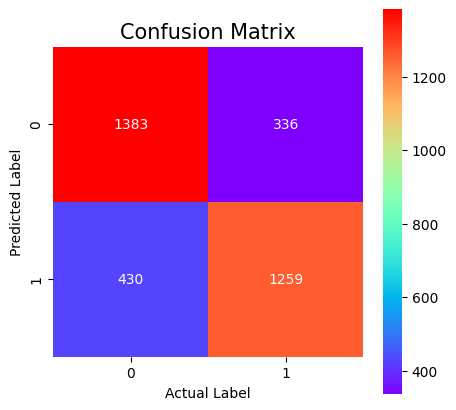

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, square = True, cmap = 'rainbow', fmt = 'g');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
plt.title("Confusion Matrix", size = 15);

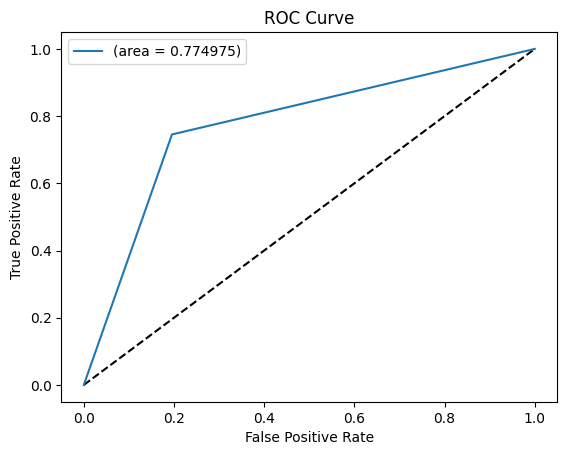

In [ ]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(fpr, tpr, threshold):
  auc = roc_auc_score(y_test, y_pred_1)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label = '(area = {:3f})'.format(auc))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='best')
  plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
plot_roc(fpr, tpr, thresholds)

# Model Building - Random Forest (RF)


##a.Base Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_auc_score

# Define Classifier
RF = RandomForestClassifier()
print(RF.get_params())

start_time = timer(None)

# Model fitting
RF.fit(X_train, y_train)

timer(start_time)

# Get the Train accuracy score
RF_train_acc = RF.score(X_train, y_train)*100

# Prediction on Test data
y_pred = RF.predict(X_test)

# Get the Test accuracy score
RF_acc     = accuracy_score(y_test, y_pred)*100
RF_pre     = precision_score(y_test, y_pred, average ='micro')
RF_recall  = recall_score(y_test, y_pred, average ='micro')
RF_f1      = f1_score(y_test, y_pred, average ='micro')
RF_auc     = roc_auc_score(y_test, y_pred)
RF_cls_rpt = classification_report(y_test, y_pred)

# Model Evaluation Measures
print('\n')
print('RF - Train Accuracy : {:.3f}'.format(RF_train_acc))
print('RF - Test Accuracy  : {:.3f}'.format(RF_acc))
print('RF - Precision      : {:.3f}'.format(RF_pre))
print('RF - Recall         : {:.3f}'.format(RF_recall))
print('RF - F1 Score       : {:.3f}'.format(RF_f1))
print('RF - AUC            : {:.3f}'.format(RF_auc))
print('\n Clasification Report:\n',(RF_cls_rpt))

{'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': None, 'verbose': 0, 'warm_start': False}

 Time taken: 0 hours 0 minutes and 0.8 seconds.


RF - Train Accuracy : 96.478
RF - Test Accuracy  : 82.394
RF - Precision      : 0.824
RF - Recall         : 0.824
RF - F1 Score       : 0.824
RF - AUC            : 0.824

 Clasification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83      1719
           1       0.83      0.81      0.82      1689

    accuracy                           0.82      3408
   macro avg       0.82      0.82      0.82      3408
weighted avg       0.82      0.82      0.82      3408



##b.HP Tuning Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# Define Classifier
RF_1 = RandomForestClassifier()

# Define Hyper Parameters for tuning
parameters = {
    'criterion': ['gini', 'entropy', 'log_loss'], # The function to measure the quality of a split
    'class_weight': ['balanced_subsample', 'balanced'], # Class Weight
    'n_estimators': [200, 1000, 100], # Number of trees in random forest
    'max_features': ['sqrt', 'log2'], # Number of features to consider at every split
    'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
    'min_samples_leaf' : [1, 2, 4], # Minimum number of samples required at each leaf node
    'bootstrap': [True, False], # Method of selecting samples for training each tree
    'random_state': [1, 42, 1],
    'max_depth': [3, 5, 1]
}

# Using RandomizedSearchCV for HP Tuning
RF_rand = RandomizedSearchCV(
    estimator = RF_1,
    param_distributions = parameters,
    scoring = 'accuracy',
    n_iter = 50,
    cv = 5,
    n_jobs = -1,
    verbose = 2,
    random_state = 42
)

start_time = timer(None)

# Model fitting
RF_rand.fit(X_train, y_train)

timer(start_time)

# To get the best parameters & score of the best model
print("\nBest Parameters:", RF_rand.best_params_)
print("\nBest Score:", RF_rand.best_score_)

# Get the Train accuracy score
RF_1_train_acc = RF_rand.score(X_train, y_train)*100


# Prediction on Test data
y_pred_1 = RF_rand.predict(X_test)

# Get the Test accuracy score
RF_1_acc     = accuracy_score(y_test, y_pred_1)*100
RF_1_pre     = precision_score(y_test, y_pred_1, average ='micro')
RF_1_recall  = recall_score(y_test, y_pred_1, average ='micro')
RF_1_f1      = f1_score(y_test, y_pred_1, average ='micro')
RF_1_auc     = roc_auc_score(y_test, y_pred_1)
RF_1_cls_rpt = classification_report(y_test, y_pred_1)

# Model Evaluation Measures
print('\n')
print('RF - Train Accuracy : {:.3f}'.format(RF_1_train_acc))
print('RF - Test Accuracy  : {:.3f}'.format(RF_1_acc))
print('RF - Precision      : {:.3f}'.format(RF_1_pre))
print('RF - Recall         : {:.3f}'.format(RF_1_recall))
print('RF - F1 Score       : {:.3f}'.format(RF_1_f1))
print('RF - AUC            : {:.3f}'.format(RF_1_auc))
print('\n Clasification Report:\n',(RF_1_cls_rpt))

df_rf = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.round(2)})
print(df_rf.head())

Fitting 5 folds for each of 50 candidates, totalling 250 fits

 Time taken: 0 hours 5 minutes and 58.42 seconds.

Best Parameters: {'random_state': 42, 'n_estimators': 1000, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 5, 'criterion': 'log_loss', 'class_weight': 'balanced', 'bootstrap': False}

Best Score: 0.8145911949685536


RF - Train Accuracy : 81.962
RF - Test Accuracy  : 81.896
RF - Precision      : 0.819
RF - Recall         : 0.819
RF - F1 Score       : 0.819
RF - AUC            : 0.819

 Clasification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.81      1719
           1       0.79      0.86      0.82      1689

    accuracy                           0.82      3408
   macro avg       0.82      0.82      0.82      3408
weighted avg       0.82      0.82      0.82      3408

       Actual  Predicted
101         1          0
7556        1          1
10411       1          1
8160     

###Tuning with SK tuner

In [ ]:
!pip install -q -U keras-tuner

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 2.8 MB/s eta 0:00:00


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score
import keras_tuner as kt
from sklearn.model_selection import StratifiedKFold

# Define Classifier by building model
def rf_model(hp):
  RF = RandomForestClassifier(
                      criterion = hp.Choice('criterion', ['gini', 'entropy', 'log_loss']),
                      class_weight = hp.Choice('class_weight', ['balanced_subsample', 'balanced']),
                      n_estimators = hp.Int('n_estimators', min_value = 200, max_value = 1000, step = 100),
                      max_features = hp.Choice('max_features', ['sqrt', 'log2']),
                      min_samples_split = hp.Int('min_samples_split', min_value = 2, max_value = 5, step = 10),
                      min_samples_leaf = hp.Int('min_samples_leaf', min_value = 1, max_value = 2, step = 4),
                      bootstrap = hp.Choice('bootstrap', [True, False]),
                      random_state = hp.Int('random_state', min_value = 1, max_value = 42, step = 1),
                      max_depth = hp.Int('max_depth', min_value = 3, max_value = 5, step = 1)
  )
  return RF

# Using SklearnTuner for HP Tuning
RF_tuner = kt.SklearnTuner(
    oracle = kt.oracles.BayesianOptimizationOracle(
        objective = kt.Objective('score','max'), max_trials = 3),
    hypermodel = rf_model,
    cv = StratifiedKFold(5),
    overwrite = True
)


start_time = timer(None)

# Model fitting
RF_tuner.search(X_tr, y_tr)

timer(start_time)

print()
best_model = RF_tuner.get_best_models(num_models = 1)[0]
print("Best Model: ", best_model)

# Get the Train accuracy score
RF_2_train_acc = best_model.score(X_tr, y_tr)*100

# Prediction on Test data
y_pred_2 = best_model.predict(X_te)

# Get the Test accuracy score
RF_2_acc     = accuracy_score(y_te, y_pred_2)*100
RF_2_pre     = precision_score(y_te, y_pred_2, average ='micro')
RF_2_recall  = recall_score(y_te, y_pred_2, average ='micro')
RF_2_f1      = f1_score(y_te, y_pred_2, average ='micro')
RF_2_auc     = roc_auc_score(y_te, y_pred_2)
RF_2_cls_rpt = classification_report(y_te, y_pred_2)

# Model Evaluation Measures
print('\n')
print('RF - Train Accuracy : {:.3f}'.format(RF_2_train_acc))
print('RF - Test Accuracy  : {:.3f}'.format(RF_2_acc))
print('RF - Precision      : {:.3f}'.format(RF_2_pre))
print('RF - Recall         : {:.3f}'.format(RF_2_recall))
print('RF - F1 Score       : {:.3f}'.format(RF_2_f1))
print('RF - AUC            : {:.3f}'.format(RF_2_auc))
print('\n Clasification Report:\n',(RF_2_cls_rpt))

df_RF = pd.DataFrame({'Actual': y_te, 'Predicted': y_pred_2.round(2)})
print(df_RF.head())

Trial 3 Complete [00h 00m 03s]
score: 0.8071698113207548

Best score So Far: 0.8093081761006291
Total elapsed time: 00h 01m 33s

 Time taken: 0 hours 1 minutes and 32.62 seconds.

Best Model:  RandomForestClassifier(bootstrap=1, class_weight='balanced_subsample',
                       criterion='log_loss', max_depth=4, n_estimators=1000,
                       random_state=23)


RF - Train Accuracy : 81.082
RF - Test Accuracy  : 81.133
RF - Precision      : 0.811
RF - Recall         : 0.811
RF - F1 Score       : 0.811
RF - AUC            : 0.812

 Clasification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80      1719
           1       0.78      0.86      0.82      1689

    accuracy                           0.81      3408
   macro avg       0.81      0.81      0.81      3408
weighted avg       0.81      0.81      0.81      3408

   Actual  Predicted
0       1          0
1       1          1
2       1          1
3       0  

[[1340  379]
 [ 238 1451]]


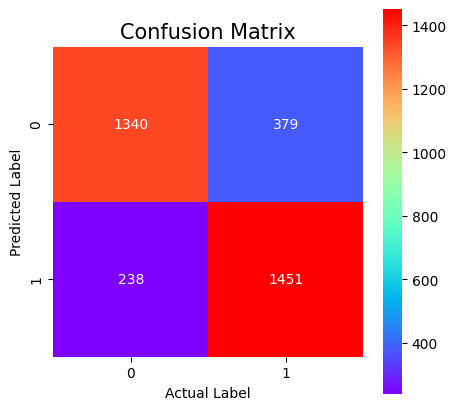

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, square = True, cmap = 'rainbow', fmt = 'g');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
plt.title("Confusion Matrix", size = 15);

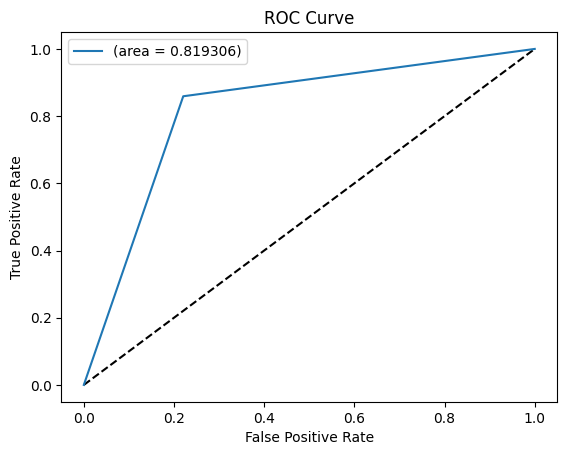

In [ ]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(fpr, tpr, threshold):
  auc = roc_auc_score(y_test, y_pred_1)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label = '(area = {:3f})'.format(auc))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='best')
  plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
plot_roc(fpr, tpr, thresholds)

                                               Importance
Lead Origin                                      0.064456
Lead Source                                      0.067921
Do Not Email                                     0.019561
Do Not Call                                      0.000046
TotalVisits                                      0.069649
Total Time Spent on Website                      0.458647
Page Views Per Visit                             0.058578
Last Activity                                    0.083228
Country                                          0.010515
What is your current occupation                  0.058189
What matters most to you in choosing a course    0.000581
Search                                           0.000433
Magazine                                         0.000000
Newspaper Article                                0.000098
X Education Forums                               0.000044
Newspaper                                        0.000200
Digital Advert

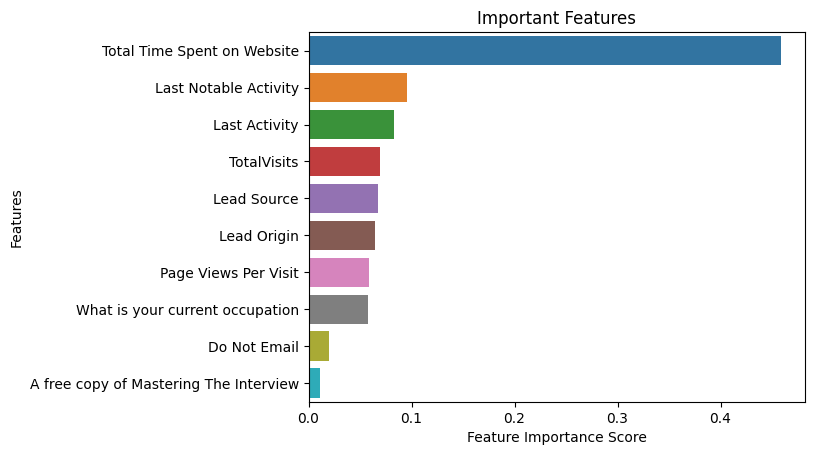

In [ ]:
# Importance Features
importance = RF.feature_importances_
importance_df = pd.DataFrame(importance, index = X_train.columns,
                             columns = ["Importance"])

print(importance_df)
print()

import matplotlib.pyplot as plt

feature_imp = pd.Series(RF.feature_importances_, index = X_train.columns).sort_values(ascending = False)

# Creating a bar plot, displaying only the top k features
sns.barplot(x = feature_imp[:10], y = feature_imp.index[:10])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show()

# Model Building - Extreme Gradient Boosting (XGBoost)

##a.Base Model

In [ ]:
!pip install xgboost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_auc_score

# Define Classifier
XGB = XGBClassifier()
print(XGB.get_params())

start_time = timer(None)

# Model fitting
XGB.fit(X_train, y_train)

timer(start_time)

# Get the Train accuracy score
XGB_train_acc = XGB.score(X_train, y_train)*100

# Prediction on Test data
y_pred = XGB.predict(X_test)

# Get the Test accuracy score
XGB_acc     = accuracy_score(y_test, y_pred)*100
XGB_pre     = precision_score(y_test, y_pred, average ='micro')
XGB_recall  = recall_score(y_test, y_pred, average ='micro')
XGB_f1      = f1_score(y_test, y_pred, average ='micro')
XGB_auc     = roc_auc_score(y_test, y_pred)
XGB_cls_rpt = classification_report(y_test, y_pred)

# Model Evaluation Measures
print('\n')
print('XGB - Train Accuracy : {:.3f}'.format(XGB_train_acc))
print('XGB - Test Accuracy  : {:.3f}'.format(XGB_acc))
print('XGB - Precision      : {:.3f}'.format(XGB_pre))
print('XGB - Recall         : {:.3f}'.format(XGB_recall))
print('XGB - F1 Score       : {:.3f}'.format(XGB_f1))
print('XGB - AUC            : {:.3f}'.format(XGB_auc))
print('\n Clasification Report:\n',(XGB_cls_rpt))

{'objective': 'binary:logistic', 'use_label_encoder': None, 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'gpu_id': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': None, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': None, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'n_estimators': 100, 'n_jobs': None, 'num_parallel_tree': None, 'predictor': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}

 Time taken: 0 hours 0 minutes and 1.3 seconds.


XGB - Train Accuracy : 89.38

##b.HP Tunning Model

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# Define Classifier
XGB_1 = XGBClassifier()

# Define Hyper Parameters for tuning
parameters = {
    'max_depth': range(3, 10, 2),
    'min_child_weight': range(1, 6, 2),
    'gamma': [i/10.0 for i in range(0, 5)],
    'subsample': [i/10.0 for i in range(6, 10)],
    'colsample_bytree': [i/10.0 for i in range(6, 10)],
    'alpha': [0, 0.001, 0.005, 0.01, 0.05]
}

# Using RandomizedSearchCV for HP Tuning
XGB_rand = RandomizedSearchCV(
    estimator = XGB_1,
    param_distributions = parameters,
    scoring = 'accuracy',
    n_iter = 100,
    cv = 5,
    n_jobs = -1,
    verbose = 2,
    random_state = 42
)

start_time = timer(None)

# Model fitting
XGB_rand.fit(X_train, y_train)

timer(start_time)

# To get the best parameters & score of the best model
print("\nBest Parameters:", XGB_rand.best_params_)
print("\nBest Score:", XGB_rand.best_score_)

# Get the Train accuracy score
XGB_1_train_acc = XGB_rand.score(X_train, y_train)*100


# Prediction on Test data
y_pred_1 = XGB_rand.predict(X_test)

# Get the Test accuracy score
XGB_1_acc     = accuracy_score(y_test, y_pred_1)*100
XGB_1_pre     = precision_score(y_test, y_pred_1, average ='micro')
XGB_1_recall  = recall_score(y_test, y_pred_1, average ='micro')
XGB_1_f1      = f1_score(y_test, y_pred_1, average ='micro')
XGB_1_auc     = roc_auc_score(y_test, y_pred_1)
XGB_1_cls_rpt = classification_report(y_test, y_pred_1)

# Model Evaluation Measures
print('\n')
print('XGB - Train Accuracy : {:.5f}'.format(XGB_1_train_acc))
print('XGB - Test Accuracy  : {:.5f}'.format(XGB_1_acc))
print('XGB - Precision      : {:.5f}'.format(XGB_1_pre))
print('XGB - Recall         : {:.5f}'.format(XGB_1_recall))
print('XGB - F1 Score       : {:.5f}'.format(XGB_1_f1))
print('XGB - AUC            : {:.5f}'.format(XGB_1_auc))
print('\n Clasification Report:\n',(XGB_1_cls_rpt))

df_XGB = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.round(2)})
print(df_XGB.head())

Fitting 5 folds for each of 100 candidates, totalling 500 fits

 Time taken: 0 hours 6 minutes and 49.34 seconds.

Best Parameters: {'subsample': 0.8, 'min_child_weight': 1, 'max_depth': 3, 'gamma': 0.4, 'colsample_bytree': 0.6, 'alpha': 0.005}

Best Score: 0.8283018867924529


XGB - Train Accuracy : 84.70440
XGB - Test Accuracy  : 84.85915
XGB - Precision      : 0.84859
XGB - Recall         : 0.84859
XGB - F1 Score       : 0.84859
XGB - AUC            : 0.84860

 Clasification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85      1719
           1       0.85      0.85      0.85      1689

    accuracy                           0.85      3408
   macro avg       0.85      0.85      0.85      3408
weighted avg       0.85      0.85      0.85      3408

       Actual  Predicted
101         1          0
7556        1          1
10411       1          1
8160        0          0
2648        0          0


[[1458  261]
 [ 255 1434]]


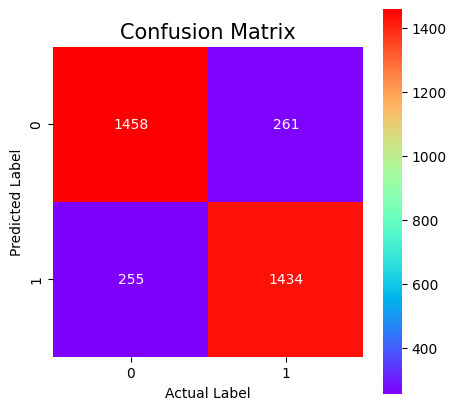

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_1)
print(cm)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, square = True, cmap = 'rainbow', fmt = 'g');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
plt.title("Confusion Matrix", size = 15);

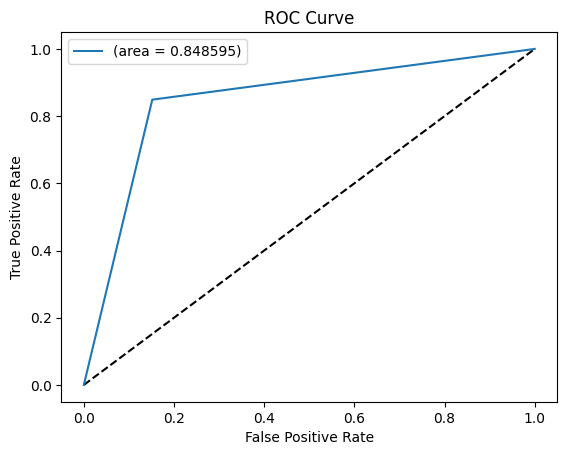

In [ ]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(fpr, tpr, threshold):
  auc = roc_auc_score(y_test, y_pred_1)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label = '(area = {:3f})'.format(auc))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='best')
  plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_1)
plot_roc(fpr, tpr, thresholds)

                                               Importance
Lead Origin                                      0.341711
Lead Source                                      0.023282
Do Not Email                                     0.120932
Do Not Call                                      0.000000
TotalVisits                                      0.045037
Total Time Spent on Website                      0.068081
Page Views Per Visit                             0.050594
Last Activity                                    0.042889
Country                                          0.018988
What is your current occupation                  0.131089
What matters most to you in choosing a course    0.000000
Search                                           0.008707
Magazine                                         0.000000
Newspaper Article                                0.000000
X Education Forums                               0.000000
Newspaper                                        0.000000
Digital Advert

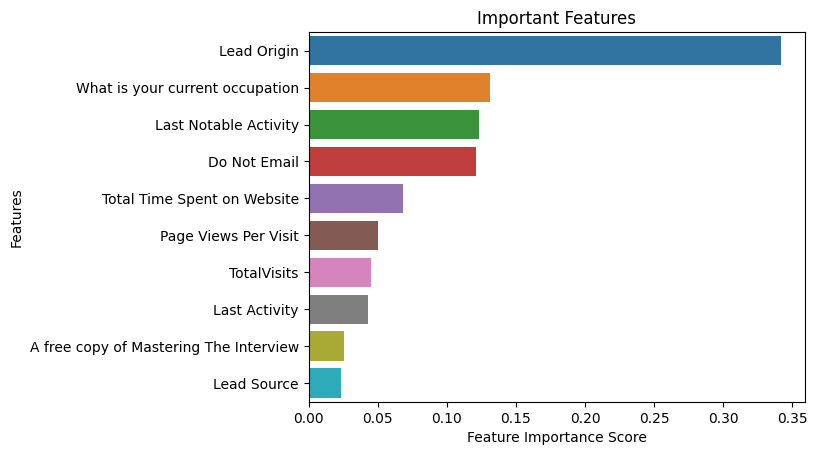

In [ ]:
# Importance Features
importance = XGB.feature_importances_
importance_df = pd.DataFrame(importance, index = X_train.columns,
                             columns = ["Importance"])

print(importance_df)
print()

import matplotlib.pyplot as plt

feature_imp = pd.Series(XGB.feature_importances_, index = X_train.columns).sort_values(ascending = False)

# Creating a bar plot, displaying only the top k features
sns.barplot(x = feature_imp[:10], y = feature_imp.index[:10])

# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title('Important Features')
plt.show()

# Model Building - Multilevel Perceptron (MLP)

##a.Base Model

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_auc_score

# Define Classifier
MLP = MLPClassifier()
print(MLP.get_params())

start_time = timer(None)

# Model fitting
MLP.fit(X_train, y_train)

timer(start_time)

# Get the Train accuracy score
MLP_train_acc = MLP.score(X_train, y_train)*100

# Prediction on Test data
y_pred = MLP.predict(X_test)

# Get the Test accuracy score
MLP_acc     = accuracy_score(y_test, y_pred)*100
MLP_pre     = precision_score(y_test, y_pred, average ='micro')
MLP_recall  = recall_score(y_test, y_pred, average ='micro')
MLP_f1      = f1_score(y_test, y_pred, average ='micro')
MLP_auc     = roc_auc_score(y_test, y_pred)
MLP_cls_rpt = classification_report(y_test, y_pred)

# Model Evaluation Measures
print('\n')
print('MLP - Train Accuracy : {:.3f}'.format(MLP_train_acc))
print('MLP - Test Accuracy  : {:.3f}'.format(MLP_acc))
print('MLP - Precision      : {:.3f}'.format(MLP_pre))
print('MLP - Recall         : {:.3f}'.format(MLP_recall))
print('MLP - F1 Score       : {:.3f}'.format(MLP_f1))
print('MLP - AUC            : {:.3f}'.format(MLP_auc))
print('\n Clasification Report:\n',(MLP_cls_rpt))

{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_fun': 15000, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}

 Time taken: 0 hours 0 minutes and 13.69 seconds.


MLP - Train Accuracy : 81.912
MLP - Test Accuracy  : 81.984
MLP - Precision      : 0.820
MLP - Recall         : 0.820
MLP - F1 Score       : 0.820
MLP - AUC            : 0.820

 Clasification Report:
               precision    recall  f1-score   support

           0       0.82      0.82      0.82      1719
           1       0.82      0.82      0.82      1689

    accuracy                           0.82      3408
   macro avg       0.82      0.82      0.82 

##b.HP Tuning Model

###Tuning with RandomizedSearchCV

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

# Define Classifier
MLP_1 = MLPClassifier()

# Define Hyper Parameters for tuning
parameters = {
    'hidden_layer_sizes': [300, 200, 10],
    'activation': ['identity','logistic', 'tanh', 'relu'],
    'solver' : ['lbfgs', 'sgd', 'adam'],
    'learning_rate' : ['constant', 'invscaling', 'adaptive'],
    'random_state' : [0, 5, 1]
}

# Using RandomizedSearchCV for HP Tuning
MLP_rand = RandomizedSearchCV(
    estimator = MLP_1,
    param_distributions = parameters,
    scoring = 'accuracy',
    n_iter = 100,
    cv = 5,
    n_jobs = -1,
    verbose = 2,
    random_state = 42
)

start_time = timer(None)

# Model fitting
MLP_rand.fit(X_train, y_train)

timer(start_time)

# To get the best parameters & score of the best model
print("\nBest Parameters:", MLP_rand.best_params_)
print("\nBest Score:", MLP_rand.best_score_)


# Get the Train accuracy score
MLP_1_train_acc = MLP_rand.score(X_train, y_train)*100

# Prediction on Test data
y_pred_1 = MLP_rand.predict(X_test)

# Get the Test accuracy score
MLP_1_acc     = accuracy_score(y_test, y_pred_1)*100
MLP_1_pre     = precision_score(y_test, y_pred_1, average ='micro')
MLP_1_recall  = recall_score(y_test, y_pred_1, average ='micro')
MLP_1_f1      = f1_score(y_test, y_pred_1, average ='micro')
MLP_1_auc     = roc_auc_score(y_test, y_pred_1)
MLP_1_cls_rpt = classification_report(y_test, y_pred_1)

# Model Evaluation Measures
print('\n')
print('MLP - Train Accuracy : {:.3f}'.format(MLP_1_train_acc))
print('MLP - Test Accuracy  : {:.3f}'.format(MLP_1_acc))
print('MLP - Precision      : {:.3f}'.format(MLP_1_pre))
print('MLP - Recall         : {:.3f}'.format(MLP_1_recall))
print('MLP - F1 Score       : {:.3f}'.format(MLP_1_f1))
print('MLP - AUC            : {:.3f}'.format(MLP_1_auc))
print('\n Clasification Report:\n',(MLP_1_cls_rpt))

df_MLP = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_1.round(2)})
print(df_MLP.head())


Fitting 5 folds for each of 100 candidates, totalling 500 fits

 Time taken: 0 hours 58 minutes and 48.4 seconds.

Best Parameters: {'solver': 'adam', 'random_state': 1, 'learning_rate': 'adaptive', 'hidden_layer_sizes': 200, 'activation': 'relu'}

Best Score: 0.8093081761006289


MLP - Train Accuracy : 81.660
MLP - Test Accuracy  : 82.072
MLP - Precision      : 0.821
MLP - Recall         : 0.821
MLP - F1 Score       : 0.821
MLP - AUC            : 0.821

 Clasification Report:
               precision    recall  f1-score   support

           0       0.85      0.78      0.82      1719
           1       0.80      0.86      0.83      1689

    accuracy                           0.82      3408
   macro avg       0.82      0.82      0.82      3408
weighted avg       0.82      0.82      0.82      3408

       Actual  Predicted
101         1          0
7556        1          1
10411       1          1
8160        0          1
2648        0          0


###Tuning with Sk tuner

In [ ]:
!pip install -q -U keras-tuner

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, f1_score, roc_curve, roc_auc_score
import keras_tuner as kt
from sklearn.model_selection import StratifiedKFold

# Define Classifier by building model
def mlp_model(hp):
  MLP = MLPClassifier(hidden_layer_sizes = (300, 200, 10),
                      max_iter = 10000,
                      activation = hp.Choice('activation',['identity','logistic', 'tanh', 'relu']),
                      solver = hp.Choice('solver', ['lbfgs', 'sgd', 'adam']),
                      learning_rate = hp.Choice('learning_rate', ['constant', 'invscaling', 'adaptive']),
                      random_state = hp.Int('random_state', min_value = 0, max_value = 5, step = 1)
  )
  return MLP

# Using SklearnTuner for HP Tuning
MLP_tuner = kt.SklearnTuner(
    oracle = kt.oracles.BayesianOptimizationOracle(
        objective = kt.Objective('score','max'), max_trials = 3),
    hypermodel = mlp_model,
    cv = StratifiedKFold(5),
    overwrite = True
)


start_time = timer(None)

# Model fitting
MLP_tuner.search(X_tr, y_tr)

timer(start_time)

print()
best_model = MLP_tuner.get_best_models(num_models = 1)[0]
print("Best Model: ", best_model)

# Get the Train accuracy score
MLP_2_train_acc = best_model.score(X_tr, y_tr)*100

# Prediction on Test data
y_pred_2 = best_model.predict(X_te)

# Get the Test accuracy score
MLP_2_acc     = accuracy_score(y_te, y_pred_2)*100
MLP_2_pre     = precision_score(y_te, y_pred_2, average ='micro')
MLP_2_recall  = recall_score(y_te, y_pred_2, average ='micro')
MLP_2_f1      = f1_score(y_te, y_pred_2, average ='micro')
MLP_2_auc     = roc_auc_score(y_te, y_pred_2)
MLP_2_cls_rpt = classification_report(y_te, y_pred_2)

# Model Evaluation Measures
print('\n')
print('MLP - Train Accuracy : {:.3f}'.format(MLP_2_train_acc))
print('MLP - Test Accuracy  : {:.3f}'.format(MLP_2_acc))
print('MLP - Precision      : {:.3f}'.format(MLP_2_pre))
print('MLP - Recall         : {:.3f}'.format(MLP_2_recall))
print('MLP - F1 Score       : {:.3f}'.format(MLP_2_f1))
print('MLP - AUC            : {:.3f}'.format(MLP_2_auc))
print('\n Clasification Report:\n',(MLP_2_cls_rpt))

df_MLP = pd.DataFrame({'Actual': y_te, 'Predicted': y_pred_2.round(2)})
print(df_MLP.head())

Trial 3 Complete [00h 14m 26s]
score: 0.8047798742138366

Best score So Far: 0.8128301886792453
Total elapsed time: 00h 19m 50s

 Time taken: 0 hours 19 minutes and 49.83 seconds.

Best Model:  MLPClassifier(hidden_layer_sizes=(300, 200, 10), max_iter=10000, random_state=2)


MLP - Train Accuracy : 82.881
MLP - Test Accuracy  : 82.365
MLP - Precision      : 0.824
MLP - Recall         : 0.824
MLP - F1 Score       : 0.824
MLP - AUC            : 0.824

 Clasification Report:
               precision    recall  f1-score   support

           0       0.84      0.81      0.82      1719
           1       0.81      0.84      0.83      1689

    accuracy                           0.82      3408
   macro avg       0.82      0.82      0.82      3408
weighted avg       0.82      0.82      0.82      3408

   Actual  Predicted
0       1          0
1       1          1
2       1          1
3       0          0
4       0          0


[[1386  333]
 [ 268 1421]]


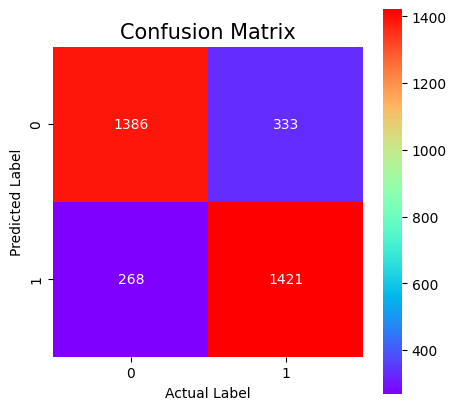

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_te, y_pred_2)
print(cm)

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, square = True, cmap = 'rainbow', fmt = 'g');
plt.xlabel('Actual Label');
plt.ylabel('Predicted Label');
plt.title("Confusion Matrix", size = 15);

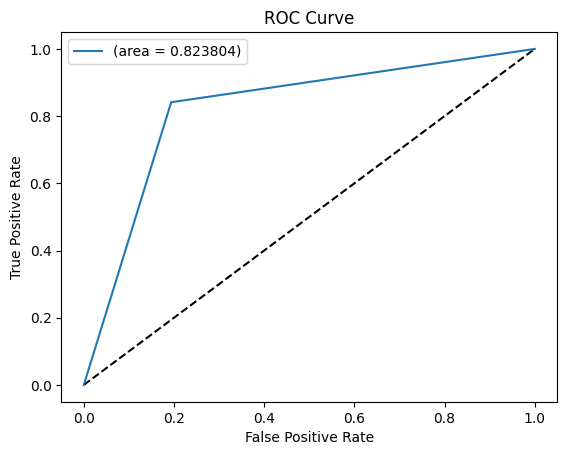

In [ ]:
# Plot ROC Curve
from sklearn.metrics import roc_curve, roc_auc_score

def plot_roc(fpr, tpr, threshold):
  auc = roc_auc_score(y_te, y_pred_2)
  plt.figure(1)
  plt.plot([0, 1], [0, 1], 'k--')
  plt.plot(fpr, tpr, label = '(area = {:3f})'.format(auc))
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')
  plt.legend(loc='best')
  plt.show()

fpr, tpr, thresholds = roc_curve(y_te, y_pred_2)
plot_roc(fpr, tpr, thresholds)